---

Tugas 6 - K-Means - Mall_Customers.csv

---

*   Rully Lukas
*   1103200181


In [ ]:
import pandas as pd

# Membaca file CSV dan membuat DataFrame
df = pd.read_csv("/content/drive/MyDrive/Datasets/Mall_Customers.csv")

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#Preprocessing

ChatGPT Propmt : "beri kode untuk drop customerID"

In [ ]:
# Drop CustomerID column
df.drop('CustomerID', axis=1, inplace=True)

# Menampilkan 5 baris pertama dari dataframe setelah penghapusan kolom CustomerID
print(df.head())

    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


ChatGPT : "beri kode untuk rename genre jadi gender"

In [ ]:
# Rename Genre column to Gender
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# Menampilkan 5 baris pertama dari dataframe setelah perubahan nama kolom
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


ChatGPT Prompt :

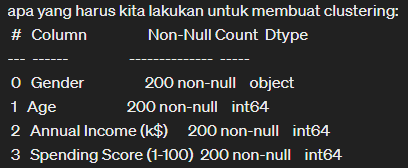

"buat untuk keempat fitur dengan gender yang sudah diubah ke numerik"

In [ ]:
# Konversi Gender ke numerik (0: Male, 1: Female)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


#Elbow Method (Mencari Clutser Terbaik)

ChatGPT Prompt : "beri kode untuk memilih jumlah kluster terbaik menggunakan elbow method"

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

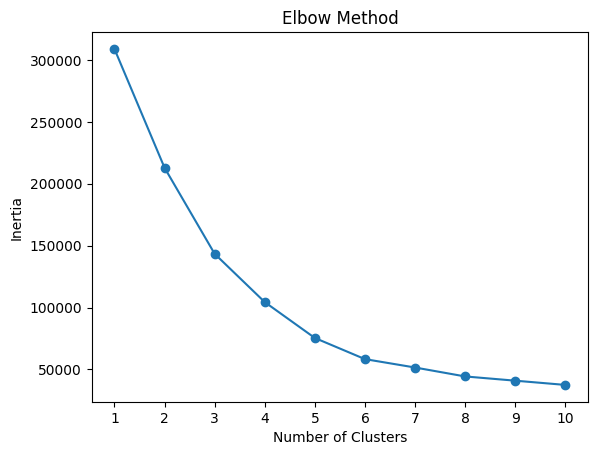

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Pemilihan fitur
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]

inertia_values = []
for k in range(1, 11):  # Coba kluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(range(1, 11))
plt.show()

#Model K-Means

ChatGPT Prompt : "beri kode untuk membuat kluster sebanyak 5 kluster dan visualisasikan"

In [ ]:
# Membuat model K-Means dengan 5 kluster
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,0
1,0,21,15,81,4
2,1,20,16,6,0
3,1,23,16,77,4
4,1,31,17,40,0
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,2
197,0,32,126,74,1
198,0,32,137,18,2


#Visualisasi

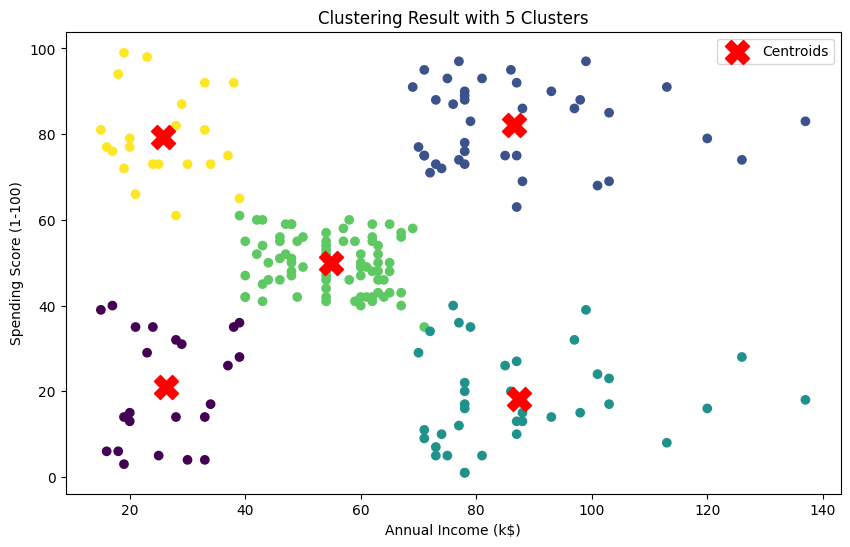

In [ ]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Result with 5 Clusters')
plt.legend()
plt.show()

#Evaluasi Model

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Menghitung silhouette score
silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Menghitung Davies-Bouldin Index
db_index = davies_bouldin_score(df, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

# Menghitung inertia score
inertia_score = kmeans.inertia_
print(f"Inertia Score: {inertia_score}")

Silhouette Score: 0.44493777835059417
Davies-Bouldin Index: 0.8184481414218574
Inertia Score: 75427.71182424156
